# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as matplot
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
longs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in lat_longs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    country = citipy.nearest_city(coord[0], coord[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

597
597


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
# ={city name},{country code}
i=0
x=0

# for city in cities
with open('data_holder.csv', 'w') as data:
    data.write('city_name,country_name,latitude,longitude,temperature,humidity,cloudiness,wind_speed,retrieved'+'\n')
    for city in cities:
        try:
            city_data = requests.get(url+cities[i]+","+countries[i]+"&units=imperial"+"&appid="+api_key).json()
            city_name = cities[i]
            country_name = countries[i]
            latitude = city_data['coord']['lat']
            longitude = city_data['coord']['lon']
            temperature = city_data['main']['temp']
            humidity = city_data['main']['humidity']
            cloudiness = city_data['clouds']['all']
            wind_speed = city_data['wind']['speed']
            date = city_data['dt']
            data.write(f'{city_name},{country_name},{latitude},{longitude},{temperature},{humidity},{cloudiness},{wind_speed},{time.strftime("%m/%d/%Y", time.gmtime(date))}'+'\n')
            print(f'Retrieved {i+1} of {len(cities)} | {cities[i]}, {countries[i]}')
            i = i + 1
            x = x + 1
        except:
            print(f'Oops, nothing to see here for {cities[i]}, {countries[i]}, moving on.')
            i = i + 1
print(f'Data retrieval complete: {x} of {len(cities)} sucessfully retrieved.')
data.close()

#city_data['clouds']['all']

#  Temperature (F) vs. Latitude
#  Humidity (%) vs. Latitude
#  Cloudiness (%) vs. Latitude
#  Wind Speed (mph) vs. Latitude

Retrieved 1 of 597 | hithadhoo, mv
Retrieved 2 of 597 | galveston, us
Retrieved 3 of 597 | stykkisholmur, is
Retrieved 4 of 597 | orange, au
Retrieved 5 of 597 | albany, au
Retrieved 6 of 597 | camaqua, br
Retrieved 7 of 597 | puerto ayora, ec
Retrieved 8 of 597 | yar-sale, ru
Oops, nothing to see here for taolanaro, mg, moving on.
Oops, nothing to see here for karauzyak, uz, moving on.
Retrieved 11 of 597 | punta arenas, cl
Retrieved 12 of 597 | ulaanbaatar, mn
Oops, nothing to see here for nizhneyansk, ru, moving on.
Retrieved 14 of 597 | saint george, bm
Retrieved 15 of 597 | butaritari, ki
Retrieved 16 of 597 | iqaluit, ca
Retrieved 17 of 597 | verkhnyaya inta, ru
Retrieved 18 of 597 | trelew, ar
Retrieved 19 of 597 | kanye, bw
Retrieved 20 of 597 | bethel, us
Retrieved 21 of 597 | filingue, ne
Retrieved 22 of 597 | ushuaia, ar
Retrieved 23 of 597 | san ramon, bo
Retrieved 24 of 597 | castro, cl
Retrieved 25 of 597 | vaini, to
Retrieved 26 of 597 | sao filipe, cv
Retrieved 27 of 59

Retrieved 214 of 597 | caravelas, br
Retrieved 215 of 597 | qinzhou, cn
Retrieved 216 of 597 | sembakung, id
Retrieved 217 of 597 | bontang, id
Retrieved 218 of 597 | phon, th
Oops, nothing to see here for tumannyy, ru, moving on.
Retrieved 220 of 597 | hibbing, us
Retrieved 221 of 597 | bjerkvik, no
Oops, nothing to see here for karkaralinsk, kz, moving on.
Retrieved 223 of 597 | belmopan, bz
Retrieved 224 of 597 | icod de los vinos, es
Retrieved 225 of 597 | dhidhdhoo, mv
Retrieved 226 of 597 | makushino, ru
Retrieved 227 of 597 | tual, id
Retrieved 228 of 597 | georgetown, sh
Retrieved 229 of 597 | huarmey, pe
Retrieved 230 of 597 | maragogi, br
Oops, nothing to see here for marzuq, ly, moving on.
Retrieved 232 of 597 | tiznit, ma
Oops, nothing to see here for sofiysk, ru, moving on.
Retrieved 234 of 597 | ulladulla, au
Retrieved 235 of 597 | ponta do sol, cv
Retrieved 236 of 597 | tilichiki, ru
Retrieved 237 of 597 | provideniya, ru
Oops, nothing to see here for camana, pe, moving 

Retrieved 424 of 597 | russell, nz
Retrieved 425 of 597 | bitung, id
Retrieved 426 of 597 | esperance, au
Retrieved 427 of 597 | ritchie, za
Oops, nothing to see here for tsihombe, mg, moving on.
Retrieved 429 of 597 | sioux lookout, ca
Retrieved 430 of 597 | jizan, sa
Retrieved 431 of 597 | linden, gy
Retrieved 432 of 597 | hambantota, lk
Retrieved 433 of 597 | monrovia, lr
Retrieved 434 of 597 | grevesmuhlen, de
Oops, nothing to see here for kadykchan, ru, moving on.
Retrieved 436 of 597 | kondinskoye, ru
Retrieved 437 of 597 | asosa, et
Retrieved 438 of 597 | panama city, us
Retrieved 439 of 597 | luau, ao
Retrieved 440 of 597 | sangar, ru
Oops, nothing to see here for manzil tamim, tn, moving on.
Retrieved 442 of 597 | kimbe, pg
Retrieved 443 of 597 | te anau, nz
Retrieved 444 of 597 | puerto baquerizo moreno, ec
Retrieved 445 of 597 | san carlos de bariloche, ar
Retrieved 446 of 597 | nuuk, gl
Retrieved 447 of 597 | kiruna, se
Retrieved 448 of 597 | gushi, cn
Retrieved 449 of 597 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df = pd.DataFrame(pd.read_csv('data_holder.csv'))
df['city_name'].count()

511

In [5]:
df.head()

,city_name,country_name,latitude,longitude,temperature,humidity,cloudiness,wind_speed,retrieved
0,hithadhoo,mv,-0.60,73.08,79.48,100,92,1.59,03/16/2019
1,galveston,us,40.58,-86.19,33.13,74,1,11.41,03/16/2019
2,stykkisholmur,is,65.08,-22.73,39.43,81,20,3.15,03/16/2019
3,orange,au,-33.28,149.10,57.96,81,32,8.97,03/16/2019
4,albany,au,-35.02,117.88,64.40,88,75,10.29,03/16/2019


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

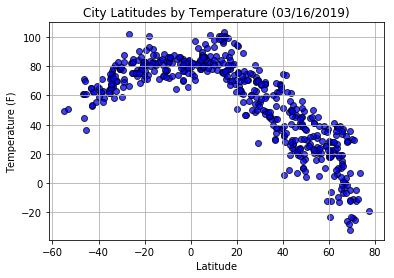

In [8]:
matplot.scatter(df['latitude'], df['temperature'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
matplot.xlabel('Latitude')
matplot.ylabel('Temperature (F)')
matplot.title(f'City Latitudes by Temperature ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
matplot.grid()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot